In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

* **This dataset provides essential information about loan applicants and their characteristics.**
* **Assessing credit risk is crucial for lenders and financial institutions.**

**Column Descriptions:**

*     **ID**: Unique identifier for each loan applicant.

*     **Age**: Age of the loan applicant.

*    **Income**: Income of the loan applicant.

*    **Home**: Home ownership status (Own, Mortgage, Rent).

*    **Emp_Length**: Employment length in years.

*    **Intent**: Purpose of the loan (e.g., education, home improvement).

*    **Amount**: Loan amount applied for.

*    **Rate**: Interest rate on the loan.

*    **Status**: Loan approval status (Fully Paid, Charged Off, Current).

*    **Percent_Income**: Loan amount as a percentage of income.

*    **Default**: Whether the applicant has defaulted on a loan previously (Yes, No).

*    **Cred_Length**: Length of the applicant's credit history.Explore this dataset, preprocess the data as needed, and develop machine learning models, especially using Random Forest, to predict loan default. Your insights and solutions could contribute to better credit risk assessment methods and potentially help lenders make more informed decisions.

**The prediction model is in the next Jupyter Notebook**

In [2]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("credit_risk.csv")
print("The dataset has {0} Rows and {1} Columns.".format(df.shape[0],df.shape[1]))
df.head(7)

The dataset has 32581 Rows and 12 Columns.


Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0   22   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   
5   5   21    9900       OWN         2.0    VENTURE    2500   7.14       1   
6   6   26   77100      RENT         8.0  EDUCATION   35000  12.42       1   

   Percent_income Default  Cred_length  
0            0.59       Y            3  
1            0.10       N            2  
2            0.57       N            3  
3            0.53       N            2  
4            0.55       Y            4  
5            0.25       N            2  
6            0.45       N            3

In [4]:
df.columns

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

In [5]:
# Dropping the ID feature
df.drop("Id",axis=1, inplace = True)

In [6]:
# Dropping duplicate values 
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)#Resetting the index to make it continuous
df.shape

(32416, 11)

In [7]:
df.dtypes

Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [8]:
# Categorical features and their values.
catg_cols = ["Home","Intent","Default"]#df.select_dtypes(include=['object'])
print(catg_cols)
for col in catg_cols:   
    print(f"{df[col].value_counts()}\nUnique values in {col}: {len(df[col].unique())}\n")

['Home', 'Intent', 'Default']
Home
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: count, dtype: int64
Unique values in Home: 4

Intent
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64
Unique values in Intent: 6

Default
N    26686
Y     5730
Name: count, dtype: int64
Unique values in Default: 2



In [9]:
df.describe()

Age        Income   Emp_length        Amount          Rate  \
count  32416.000000  3.241600e+04  31529.00000  32416.000000  29321.000000   
mean      27.747008  6.609164e+04      4.79051   9593.845632     11.017265   
std        6.354100  6.201558e+04      4.14549   6322.730241      3.241680   
min       20.000000  4.000000e+03      0.00000    500.000000      5.420000   
25%       23.000000  3.854200e+04      2.00000   5000.000000      7.900000   
50%       26.000000  5.500000e+04      4.00000   8000.000000     10.990000   
75%       30.000000  7.921800e+04      7.00000  12250.000000     13.470000   
max      144.000000  6.000000e+06    123.00000  35000.000000     23.220000   

             Status  Percent_income   Cred_length  
count  32416.000000    32416.000000  32416.000000  
mean       0.218688        0.170250      5.811297  
std        0.413363        0.106812      4.059030  
min        0.000000        0.000000      2.000000  
25%        0.000000        0.090000      3.000000  
50%        0.000000        0.150000      4.000000  
75%        0.000000        0.230000      8.000000  
max        1.000000        0.830000     30.000000

**The max values for Age and Emp_length seem to be unusual. Let's check it.**

In [10]:
max_ages = (df.Age > 99) | (df.Emp_length > 90)
max_ages = df[max_ages]
print(f"Total rows:{len(max_ages)}")
max_ages

Total rows:7


Age   Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0       22    59000      RENT       123.0   PERSONAL   35000  16.02       1   
81     144   250000      RENT         4.0    VENTURE    4800  13.57       0   
183    144   200000  MORTGAGE         4.0  EDUCATION    6000  11.86       0   
210     21   192000  MORTGAGE       123.0    VENTURE   20000   6.54       0   
575    123    80004      RENT         2.0  EDUCATION   20400  10.25       0   
747    123    78000      RENT         7.0    VENTURE   20000    NaN       0   
32132  144  6000000  MORTGAGE        12.0   PERSONAL    5000  12.73       0   

       Percent_income Default  Cred_length  
0                0.59       Y            3  
81               0.02       N            3  
183              0.03       N            2  
210              0.10       N            4  
575              0.25       N            3  
747              0.26       N            4  
32132            0.00       N           25

In [11]:
# Dropping these values
rows_to_drop = max_ages.index
df.drop(rows_to_drop, inplace = True)
df = df.reset_index(drop=True)
df.shape

(32409, 11)

# **Exploring Null Values**

In [12]:
null_value_counts = df.isnull().sum()
null_value_counts

Age                  0
Income               0
Home                 0
Emp_length         887
Intent               0
Amount               0
Rate              3094
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

Text(0.5, 1.0, 'Null values Distribution')

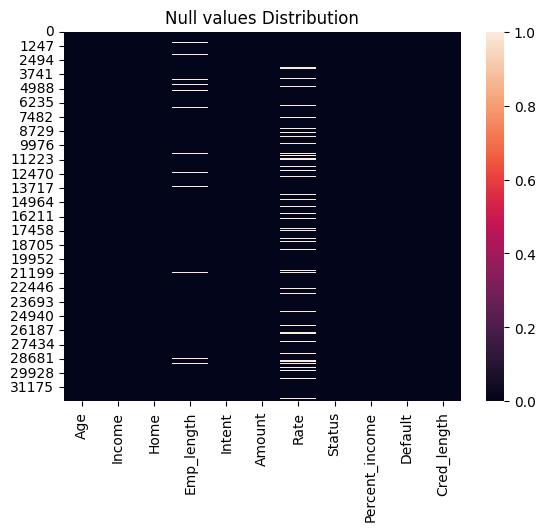

In [13]:
sns.heatmap(df.isnull())
plt.title("Null values Distribution")

In [14]:
# Percentage of null value cells
total_null_cells = null_value_counts.sum()
total_cells = np.prod(df.shape)

null_cells_percentage = (total_null_cells / total_cells) * 100
print("Null Cells Percentage: ",np.round(null_cells_percentage,2),"%")

Null Cells Percentage:  1.12 %


In [15]:
# Checking features for 0 value 
num_cols = ["Age","Income","Emp_length","Amount","Rate","Percent_income","Cred_length"]
for col in num_cols:
    if 0 in df[col].values:
        zero_rows = df.query(f"{col} == 0")
        print(f"{col} has {len(zero_rows)} rows with value zero.")

Emp_length has 4086 rows with value zero.
Percent_income has 8 rows with value zero.


In [16]:
Percent_income_0 = df.query("Percent_income == 0")
Percent_income_0

Age   Income      Home  Emp_length             Intent  Amount   Rate  \
17706   34   948000  MORTGAGE        18.0           PERSONAL    2000   9.99   
18789   35   510000      RENT         1.0           PERSONAL    1800  13.48   
27749   30   522000  MORTGAGE        11.0    HOMEIMPROVEMENT    2500   7.43   
29884   42  2039784      RENT         0.0            VENTURE    8450  12.29   
31751   43   780000  MORTGAGE         2.0    HOMEIMPROVEMENT    1000   8.94   
31757   47  1362000  MORTGAGE         9.0            VENTURE    6600   7.74   
31759   44  1440000  MORTGAGE         7.0  DEBTCONSOLIDATION    6400   7.40   
32374   60  1900000  MORTGAGE         5.0           PERSONAL    1500    NaN   

       Status  Percent_income Default  Cred_length  
17706       0             0.0       N            7  
18789       0             0.0       N            6  
27749       0             0.0       N            9  
29884       0             0.0       Y           15  
31751       0             0.0       N           11  
31757       0             0.0       N           17  
31759       0             0.0       N           15  
32374       0             0.0       N           21

**Here the ratio or percentage between the Income and the Amount asked is very very minute , also the Percent_Income feature is scaled to fit between 0 and 1. So it'll be better to keep these values as they are.**

In [17]:
Emp_length_0 = df.query("Emp_length == 0")
Emp_length_0.head()

Age  Income      Home  Emp_length             Intent  Amount   Rate  \
15   23  120000      RENT         0.0          EDUCATION   35000   7.90   
22   24   10980       OWN         0.0           PERSONAL    1500   7.29   
26   23   11000       OWN         0.0           PERSONAL    1400   9.32   
44   26  300000  MORTGAGE         0.0          EDUCATION   25000  15.33   
48   26   89028      RENT         0.0  DEBTCONSOLIDATION   30000   6.62   

    Status  Percent_income Default  Cred_length  
15       0            0.29       N            4  
22       0            0.14       N            3  
26       0            0.13       N            3  
44       0            0.08       N            3  
48       1            0.34       N            3

**When it comes to Employment length many candidates might have choosen not to provide the information or it is actually 0, so it is hard to distinguish between them, unless we know the source of the data and have more understanding about them. So it's better to keep them as it is.**

In [18]:
Emp_length_na = df.query("Emp_length.isna()")
Emp_length_na.describe()

Age         Income  Emp_length        Amount        Rate  \
count  887.000000     887.000000         0.0    887.000000  820.000000   
mean    27.312289   44308.392334         NaN   7059.188275   10.039902   
std      5.897210   37472.609235         NaN   5208.977655    3.464062   
min     21.000000    4200.000000         NaN   1000.000000    5.420000   
25%     23.000000   24000.000000         NaN   3200.000000    6.990000   
50%     25.000000   36000.000000         NaN   6000.000000    9.910000   
75%     30.000000   55000.000000         NaN   9775.000000   12.690000   
max     70.000000  648000.000000         NaN  35000.000000   21.360000   

           Status  Percent_income  Cred_length  
count  887.000000      887.000000   887.000000  
mean     0.316798        0.191218     5.636979  
std      0.465490        0.121127     3.847122  
min      0.000000        0.010000     2.000000  
25%      0.000000        0.090000     3.000000  
50%      0.000000        0.170000     4.000000  
75%      1.000000        0.265000     8.000000  
max      1.000000        0.650000    27.000000

In [19]:
rate_na = df.query("Rate.isna()")
rate_na.head()

Age  Income      Home  Emp_length             Intent  Amount  Rate  \
38   23   71500      RENT         3.0  DEBTCONSOLIDATION   30000   NaN   
49   24   78000      RENT         4.0  DEBTCONSOLIDATION   30000   NaN   
56   23  277000       OWN         3.0           PERSONAL   35000   NaN   
58   24   12000       OWN         2.0            VENTURE    1750   NaN   
61   26  263000  MORTGAGE         0.0          EDUCATION   10000   NaN   

    Status  Percent_income Default  Cred_length  
38       1            0.42       N            4  
49       1            0.38       Y            4  
56       0            0.13       N            4  
58       0            0.15       Y            3  
61       1            0.04       N            4

**Overall, the dataset has a considerable amount of NAN values and Cell with value 0 in Emp_length, we will take care of the NaN values but better imputation could be done if the reason for the values missing could be known from the source..thereby improving the prediction model.**

# **Checking for Co-relatons before Imputation**

In [20]:
num_df = df.copy()
num_df = num_df.drop(columns=catg_cols,axis=1)

In [21]:
corr = num_df.corr()
corr

Age    Income  Emp_length    Amount      Rate    Status  \
Age             1.000000  0.140487    0.172481  0.051646  0.011129 -0.021774   
Income          0.140487  1.000000    0.154411  0.316732 -0.001019 -0.169262   
Emp_length      0.172481  0.154411    1.000000  0.111086 -0.058474 -0.086313   
Amount          0.051646  0.316732    0.111086  1.000000  0.146926  0.105601   
Rate            0.011129 -0.001019   -0.058474  0.146926  1.000000  0.335812   
Status         -0.021774 -0.169262   -0.086313  0.105601  0.335812  1.000000   
Percent_income -0.041468 -0.294766   -0.058462  0.572632  0.120111  0.379580   
Cred_length     0.878240  0.122654    0.149619  0.042139  0.015855 -0.016441   

                Percent_income  Cred_length  
Age                  -0.041468     0.878240  
Income               -0.294766     0.122654  
Emp_length           -0.058462     0.149619  
Amount                0.572632     0.042139  
Rate                  0.120111     0.015855  
Status                0.379580    -0.016441  
Percent_income        1.000000    -0.031214  
Cred_length          -0.031214     1.000000

<Axes: >

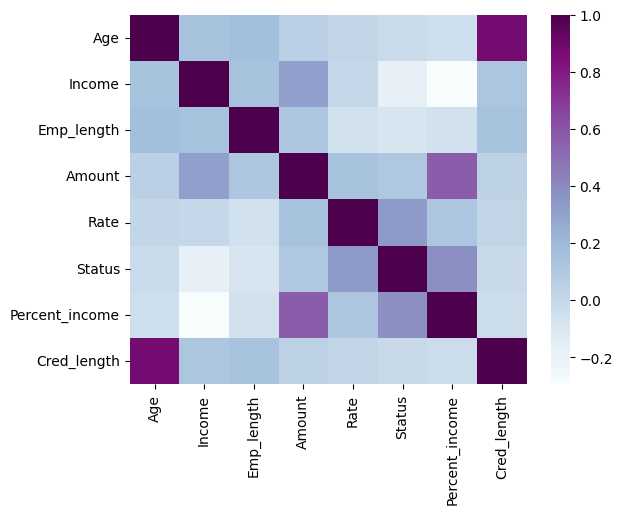

In [22]:
sns.heatmap(corr, cmap="BuPu")

* **The majority of the features don't even have a weak co-relation.**
* **The target feature "Status" also does'nt seem to have any strong co-relation with any other feature.**
* **If any of the features had a strtong co-relation with the features having missing values, we could've imputed them using regression or other techniques.**

# **Imputation**

In [23]:
# Imputing NaN values with the feature's mean
imputer = SimpleImputer(strategy='mean')
df['Rate'] = imputer.fit_transform(df[['Rate']])
df['Emp_length'] = imputer.fit_transform(df[['Emp_length']])

# **Visualization**

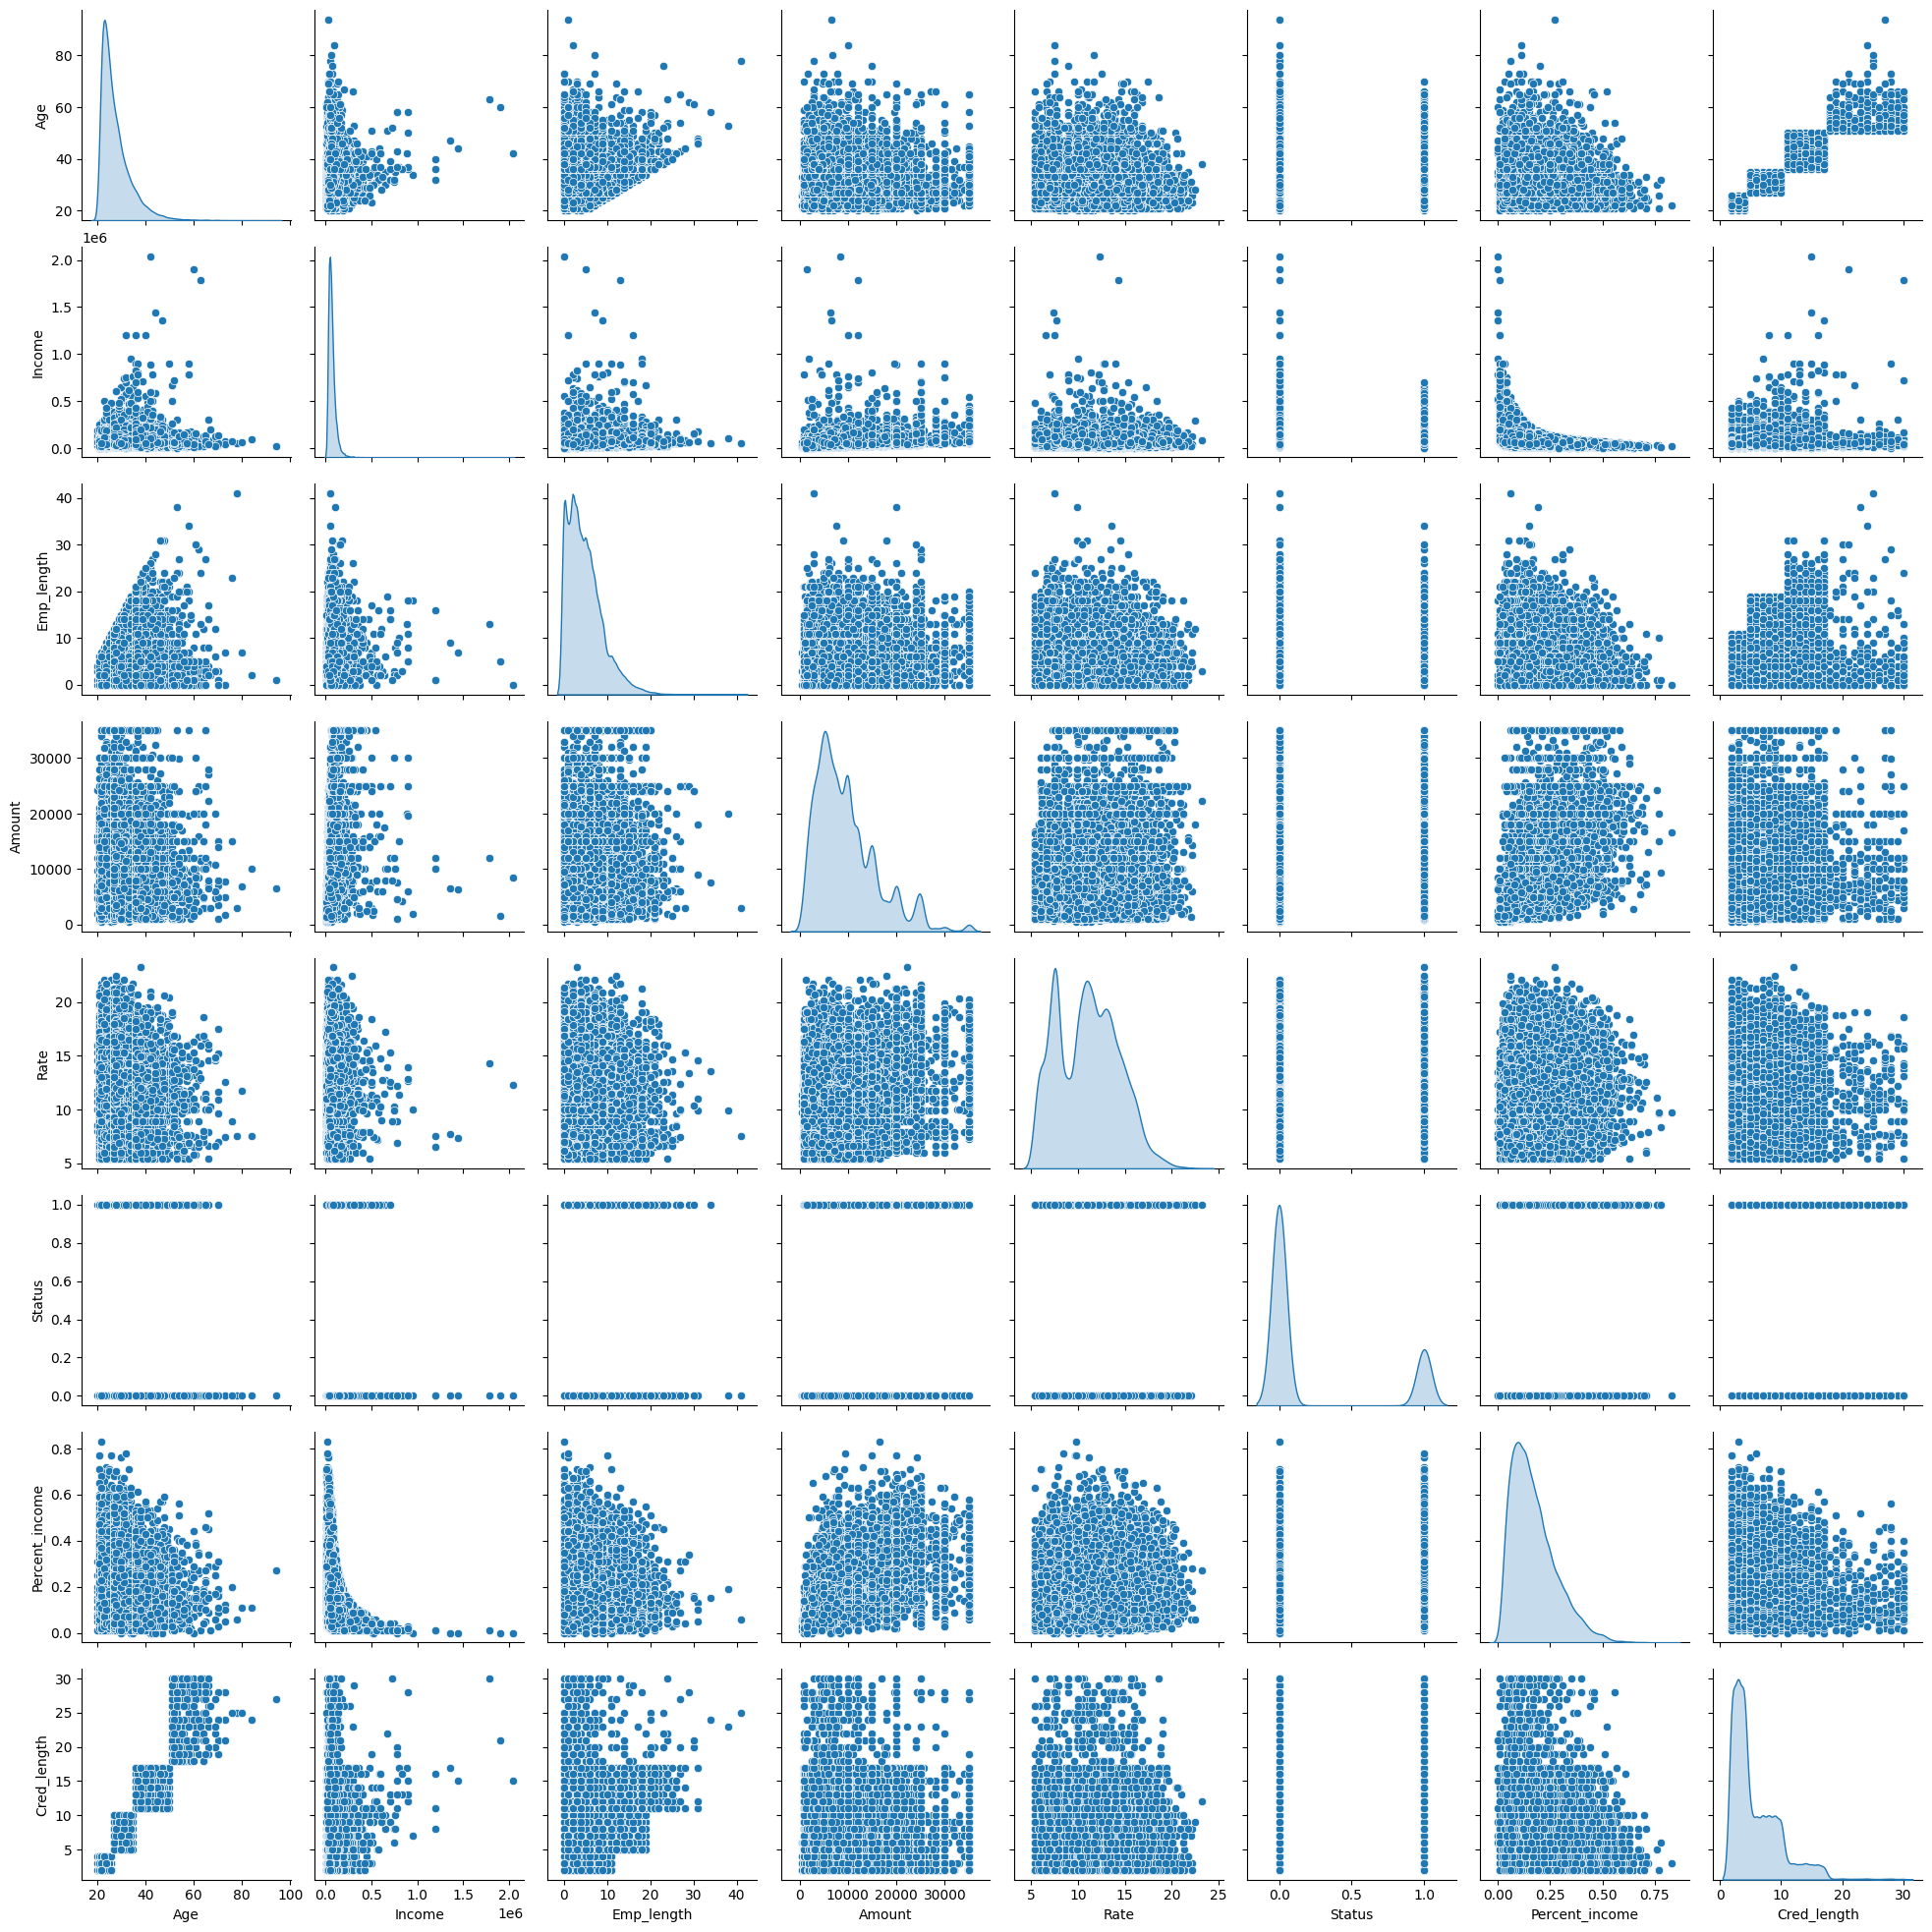

In [24]:
sns.pairplot(num_df, diag_kind="kde", markers="o")

Text(0.5, 1.0, 'Age Distribution')

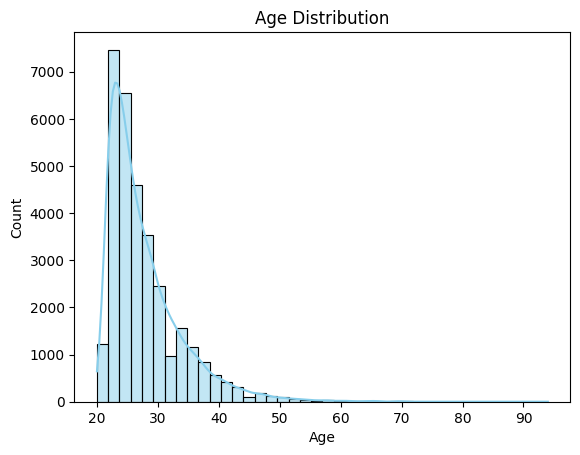

In [25]:
sns.histplot(df.Age, bins=40, kde=True, color='skyblue')
plt.title("Age Distribution")

**We have a positive skew, most of the applicants are between the ages 20 - 30.**

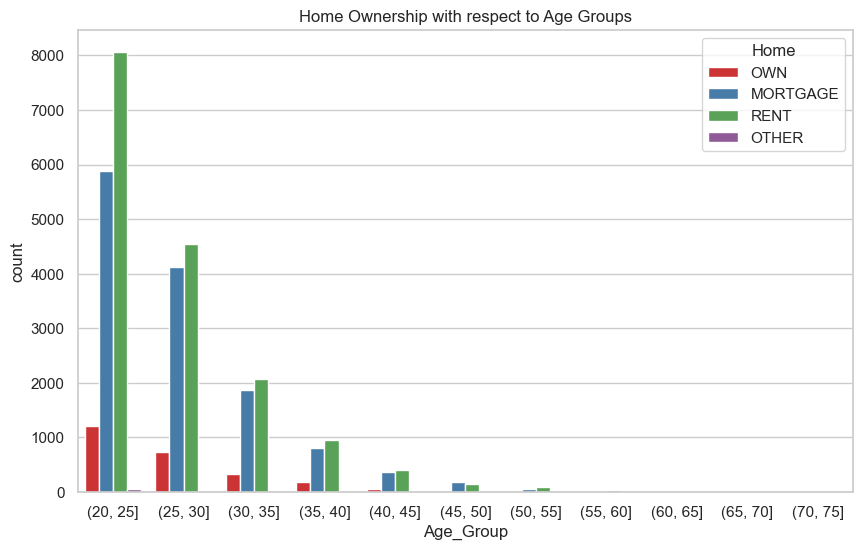

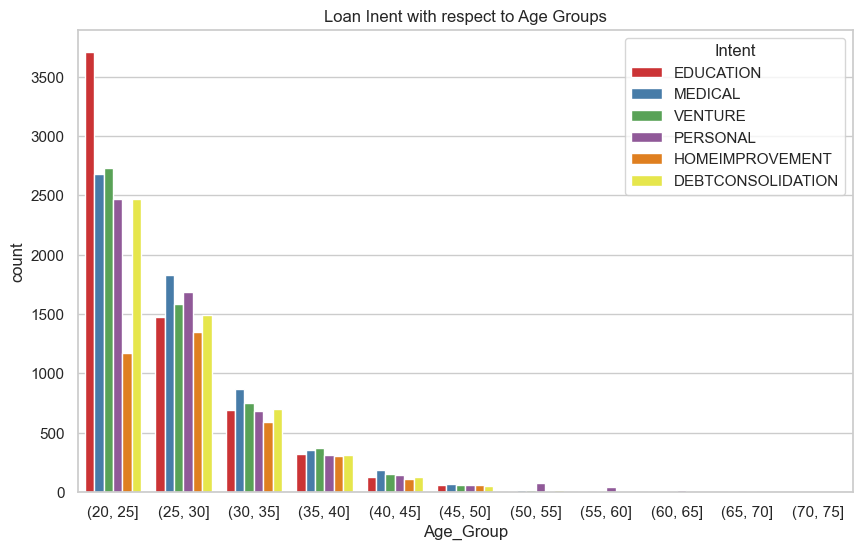

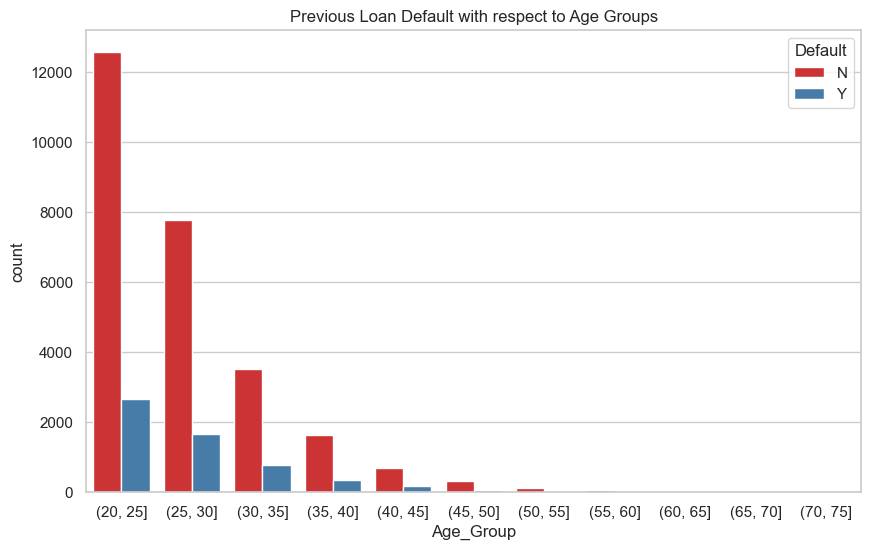

In [26]:
df2 = df.copy()
age_bins = [20,25,30, 35, 40, 45, 50, 55, 60,65,70,75]
titles = ["Home Ownership", "Loan Inent", "Previous Loan Default"]
df2['Age_Group'] = pd.cut(df2['Age'], bins=age_bins)
t = 0

for col in catg_cols:
    sns.set(style="whitegrid") 
    plt.figure(figsize=(10, 6)) 
    sns.countplot(data=df2, x='Age_Group', hue=col, palette='Set1')
    plt.title(f"{titles[t]} with respect to Age Groups")
    t+=1

* **Rent is the primary way of Home Ownership followed by Mortgage across all Age Groups.**
* **Eduction is the main Intent for age group 20-25,we see a decrease in that with increasing age.**
* **MOre people have not defaulted on their previous loan across all ages.**

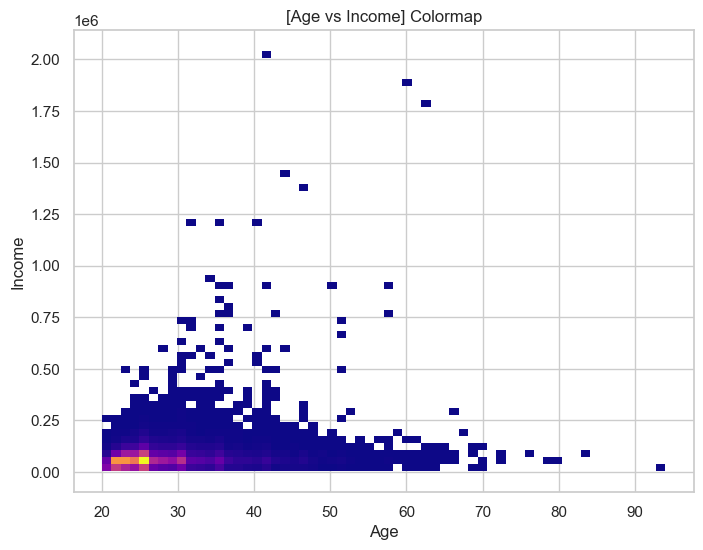

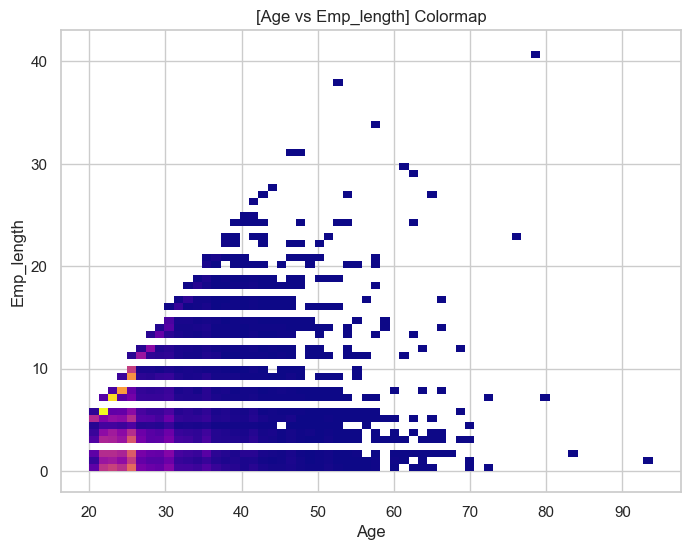

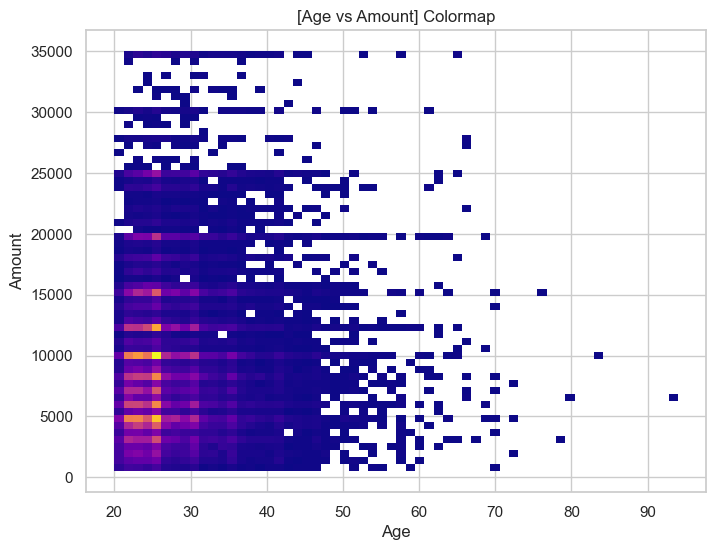

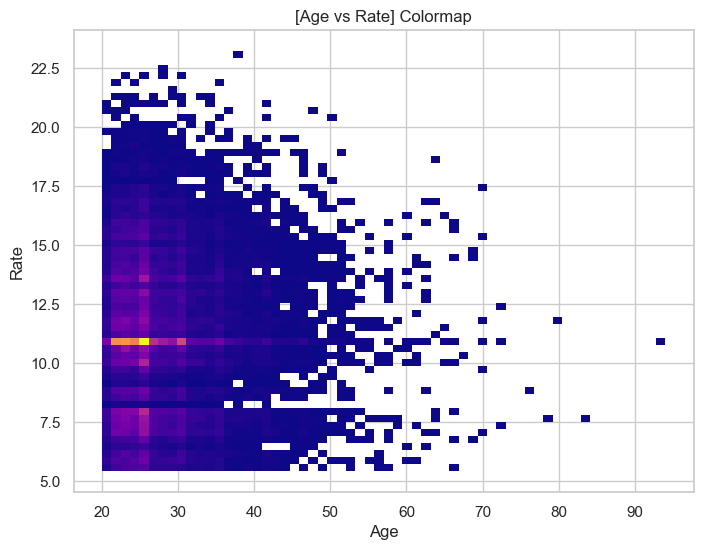

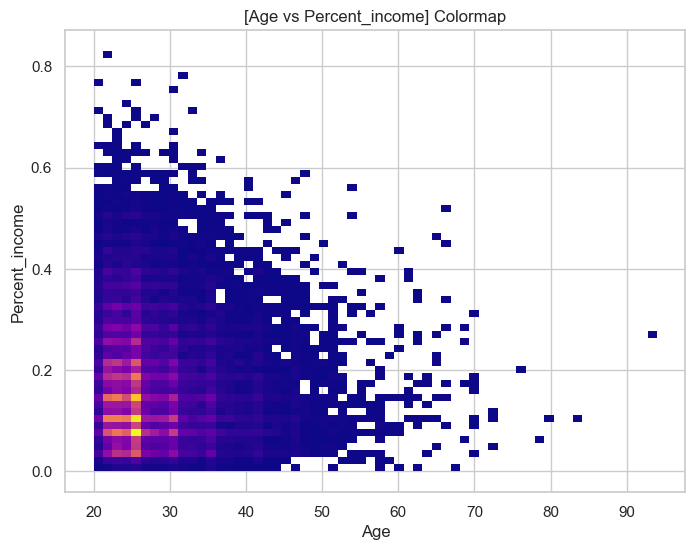

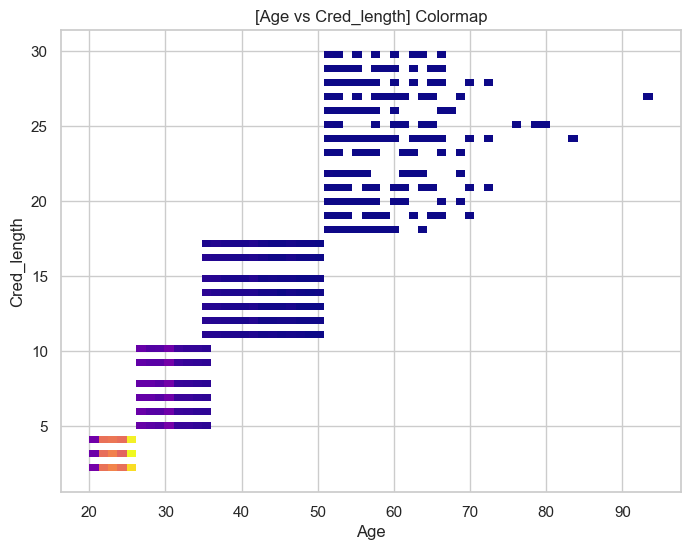

In [27]:
num_cols.remove("Age")
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df2, x='Age', y=col, bins=(60, 60), cmap='plasma')
    plt.xlabel('Age')
    plt.ylabel(col)
    plt.title(f'[Age vs {col}] Colormap')
    plt.show()

* **We can see a slight decrease in Income with increasing age among the applicants.**
* **We can see a increase in Max Employment years with increasing Age.**
* **Also we see a strong clustering between the Credit_length in years and Age amongst the applicants.**

C:\Users\ZAINAB\AppData\Local\Temp\ipykernel_13300\1379805573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


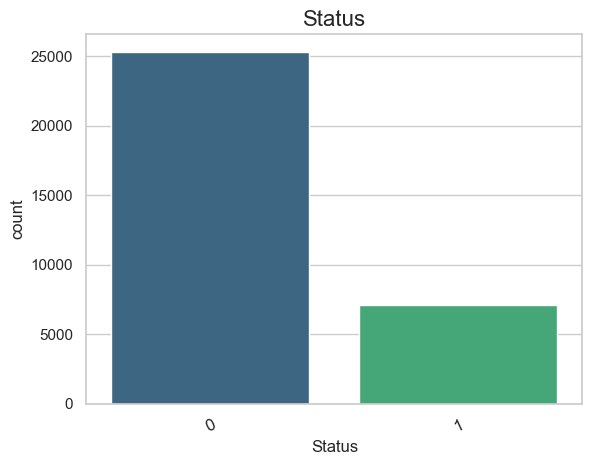

C:\Users\ZAINAB\AppData\Local\Temp\ipykernel_13300\1379805573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


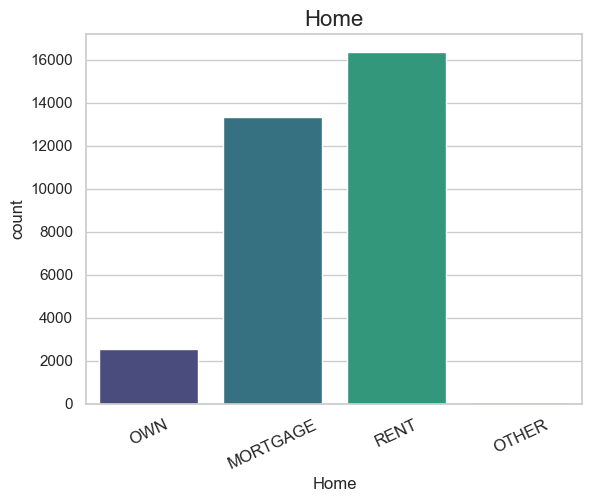

C:\Users\ZAINAB\AppData\Local\Temp\ipykernel_13300\1379805573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


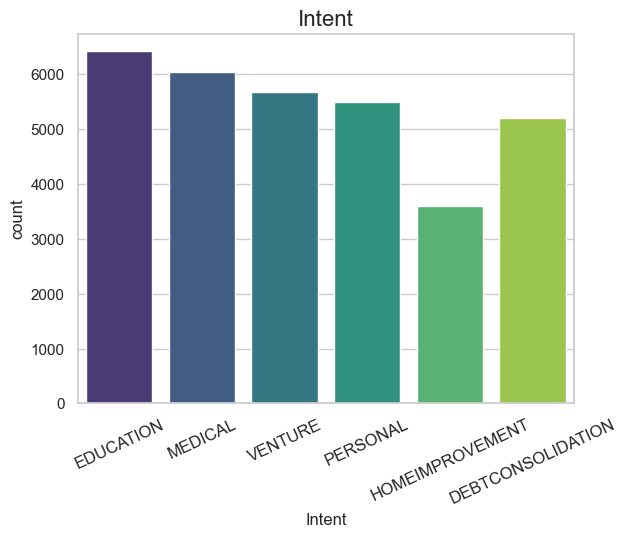

C:\Users\ZAINAB\AppData\Local\Temp\ipykernel_13300\1379805573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


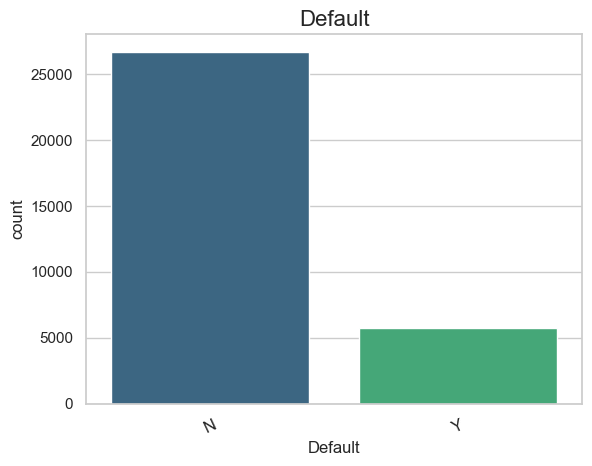

In [28]:
count_cols = ["Status","Home","Intent","Default"]
for col in count_cols:
    sns.countplot(x=df[col], palette="viridis")
    plt.title(col, fontsize = 16)
    plt.xticks(rotation=25,fontsize = 12)
    plt.show()

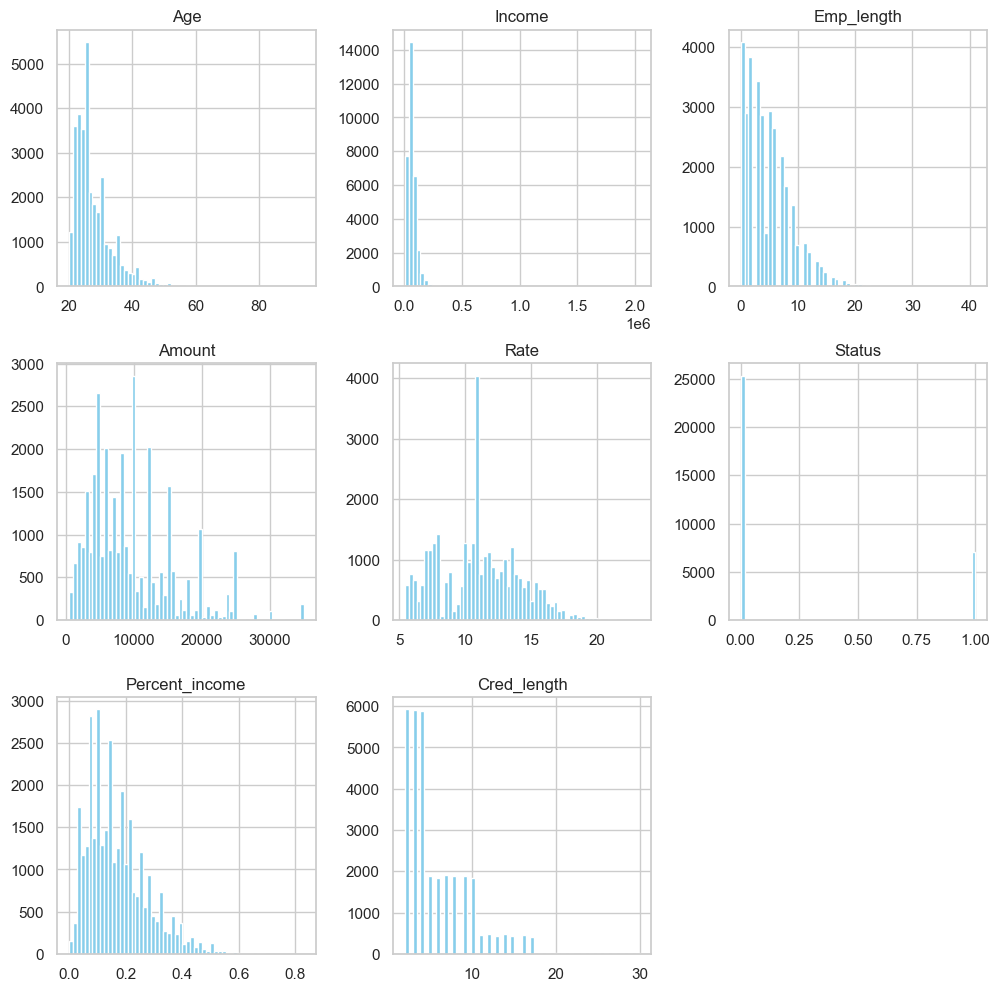

In [29]:
df.hist(bins=60, figsize=(12,12), color ="skyblue")
plt.show()

**As "Status" is our target feature, we will look into its distribution before modelling.**

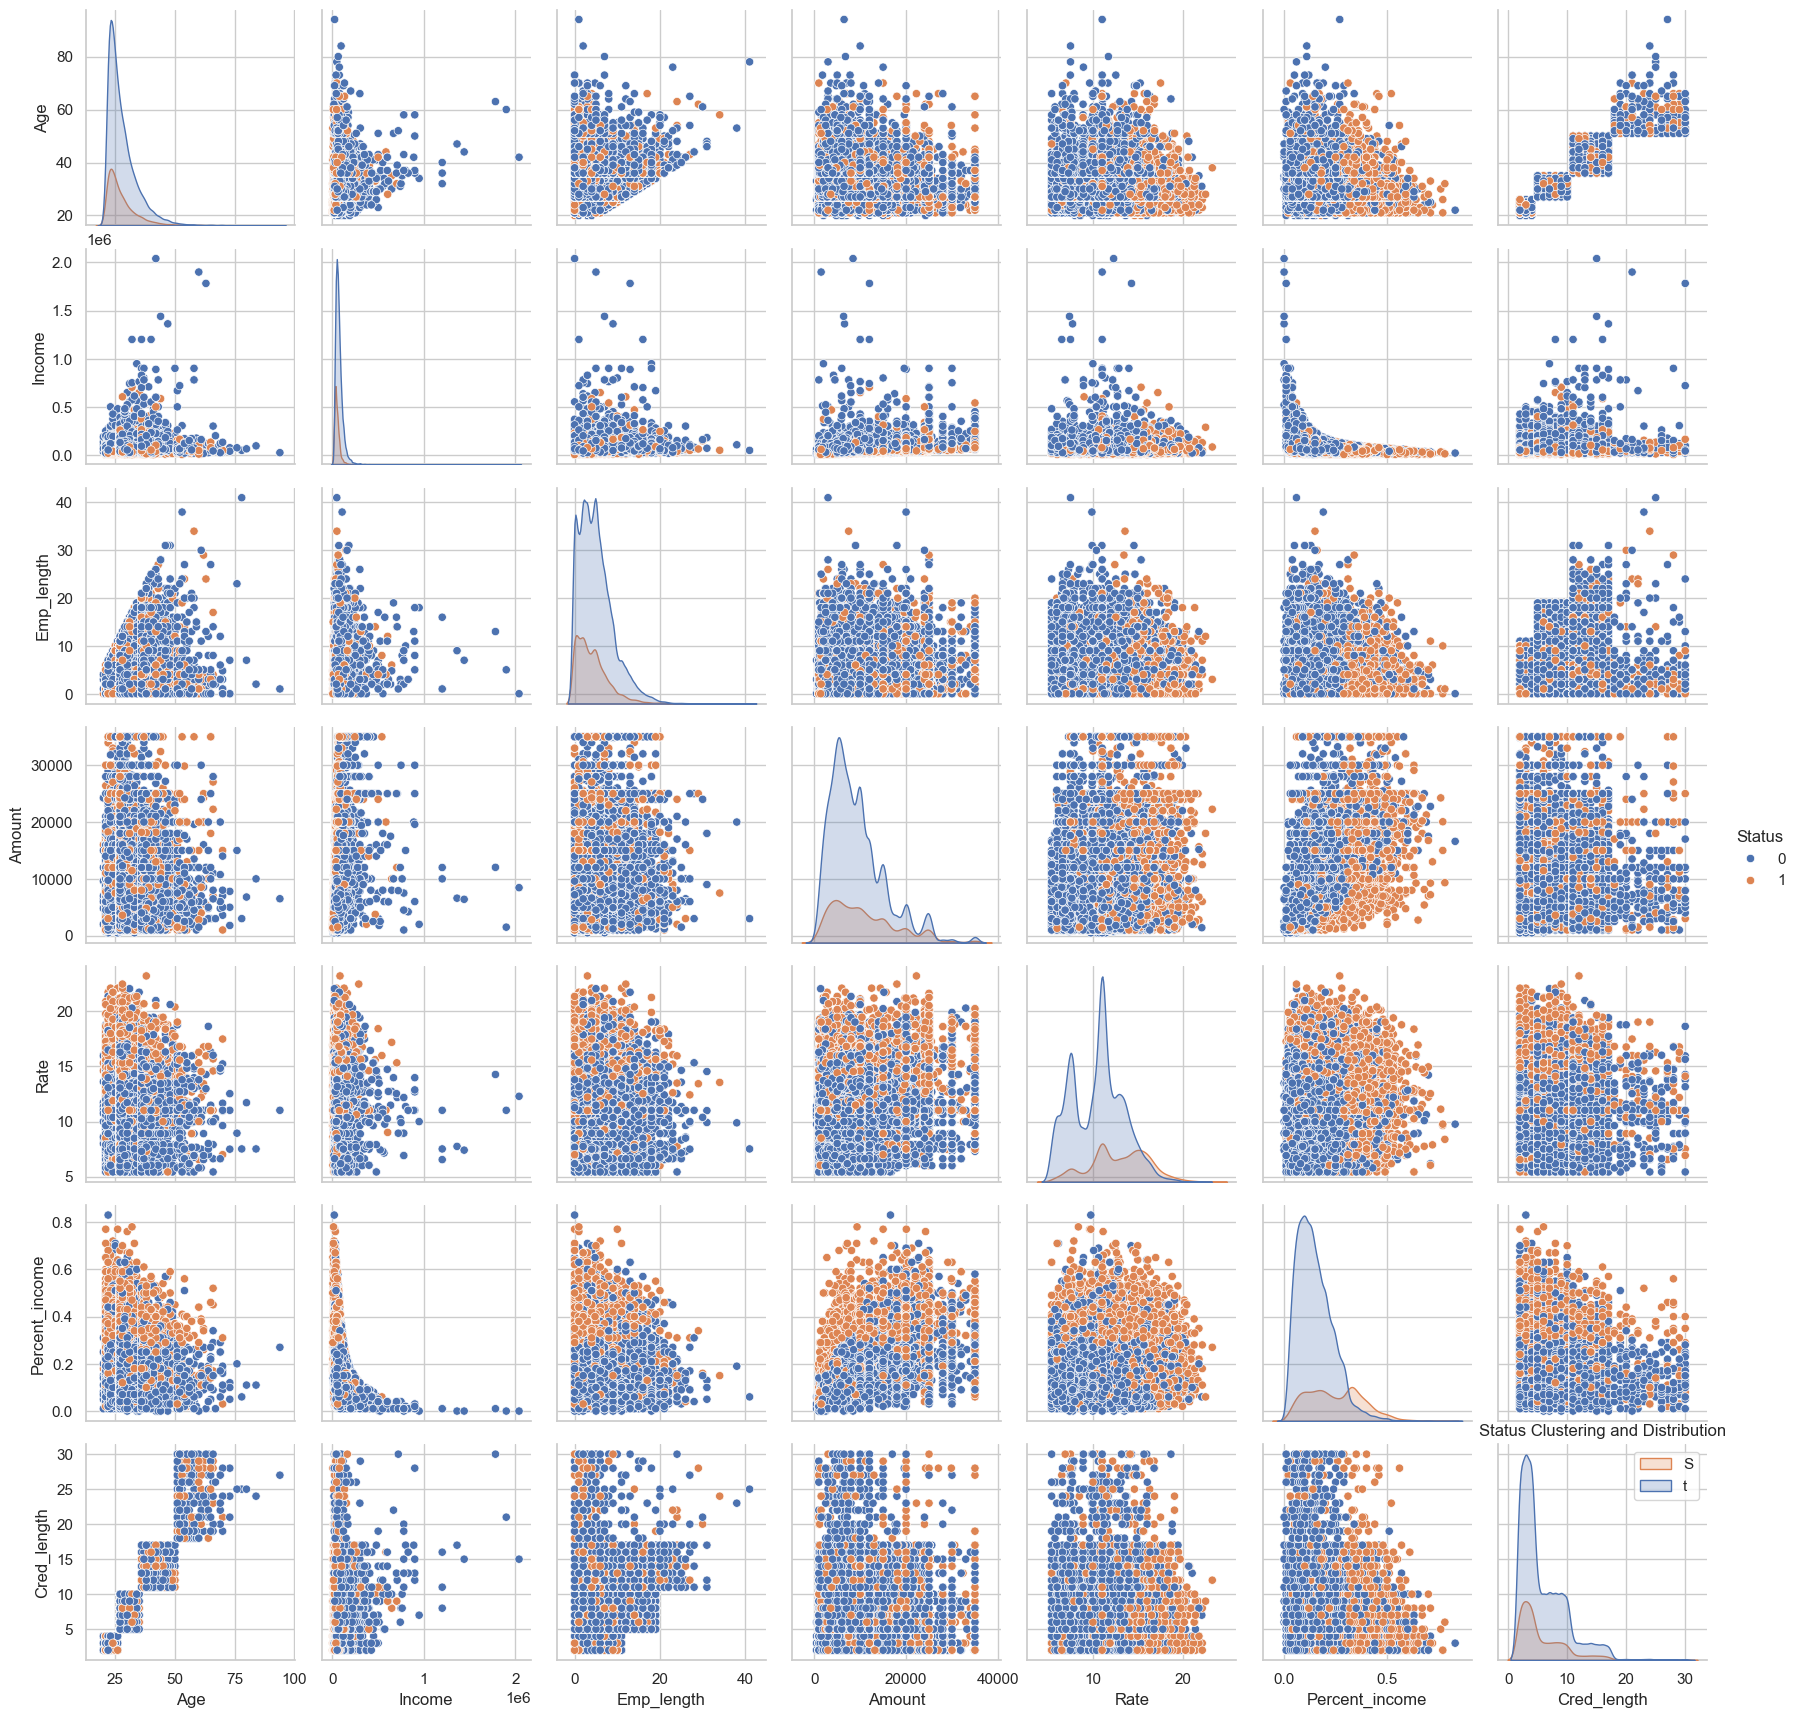

In [30]:
sns.pairplot(df,hue='Status')
plt.title("Status Clustering and Distribution")
plt.legend("Status Clustering and Distribution")

* **Looking at the pairplot for the target value "Status", we can get a rough idea of which ML model would work better for prediction.**
* **Ex: Logistic Regressor won't be the best choice here as it aims to find the best fit line between clusters/data points clearly dividing them into two...but here we can see the distribution of Status has no proper separate clustering. Same is the case with SVM**
* **If there was a clear Overlapping, KNN would do very well but here even though there is some overlapping its very scattered.**
* **Here DescisionTrees and any ensemble model like XGBoost, RandomForest, etc should do pretty well.**


The Prediction Model is in the Next Jupyter Notebook